<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 5: Supervised Learning </h3> </center>
<center> <h4> Hands-on: Heart Attack </h4> </center>
*

###**WORKING ENVIRONMENT SET UP**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV


# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

# Save model / deployment
import pickle
import sys


## 1.- Load Data

Based on data from public databases, such as the MIT-BIH Malignant Ventricular Arrhythmia database (VFDB), the Creighton University Ventricular Tachycardia database (CUDB) containing a selection of long-term Holter ECG recording, we computed a combination of 30 previously defined ECG features. The aim of this study is to explore the differences in the detection of Sh rhythms using different classification algorithms. 


### **Description**

**Temporal features** to characterize the amplitude, slope, sample distribution or heart rate of the rhythm. 

* TCI = threshold crossing interval 

* TCSC = threshold crossing sample count 

* Exp = standard exponential

* Expmod = modified exponential 

* MAV = mean absolute value

* count1 

* count2 

* count3

* x1

* x2

* bCP

**Spectral features** to quantify spectral concentration, normalized spectral moments or the rela- tive power content in different frequency bands.

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Time-frequency features**

* Li = The Li feature based on the wavelet analysis of the ECG.

**Complexity features** The most representative measures of the complexity of the ECG

* CM = complexity measure

* CVbin = covariance

* abin = area

* Frqbin = frequency

* Kurt = Kurtosis of a binary signal extracted from the ECG

* PSR = The phase space recon- struction 

* HILB = Hilbert transform

* SamEn = Sample entropy

In [ ]:
!gdown https://drive.google.com/uc?id=1-HawKyt8oVxSubWM2958xkZEu5sCgY8Y
# https://drive.google.com/file/d/1-HawKyt8oVxSubWM2958xkZEu5sCgY8Y/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1-HawKyt8oVxSubWM2958xkZEu5sCgY8Y
To: /content/heart_train.csv
100% 784k/784k [00:00<00:00, 89.3MB/s]


In [ ]:
data = pd.read_csv('heart_train.csv')

In [ ]:
data.columns

Index(['TCI', 'TCSC', 'exp', 'expmod', 'cm', 'cvbin', 'frqbin', 'abin', 'kurt',
       'vfleak', 'M', 'A1', 'A2', 'A3', 'mav', 'psr', 'hilb', 'SamEn', 'x3',
       'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW', 'Li', 'count1', 'count2',
       'count3', 'VF', 'Id'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


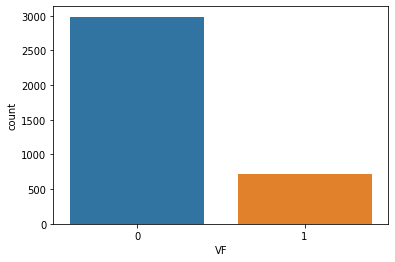

In [ ]:
sns.countplot(data['VF']);

Observamos un dataset bastante desbalanceado en cuanto a la proporción de los resultados de la salida. 

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
data = data.drop('Id',axis=1)
data.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,1055.8,4.7333,90,60,0.19932,0.22920,3.00,645,20.331,0.83436,...,0.43245,0.14227,0.918,0.027611,7.6904,15.452,14.50,61.00,4.1044,0
1,1084.0,3.1333,75,45,0.15945,0.23879,3.00,607,22.517,0.82827,...,0.46083,0.14602,0.912,0.024376,7.6904,22.162,16.25,57.50,4.3208,0
2,1084.2,3.1333,75,45,0.14949,0.24952,2.75,527,23.421,0.81930,...,0.46989,0.12867,0.924,0.030298,7.5073,15.159,12.75,51.75,3.0232,0
3,1084.4,4.8000,90,60,0.16942,0.24267,3.25,587,19.999,0.82824,...,0.46194,0.14085,0.922,0.030700,7.5684,12.685,15.75,59.25,4.3658,0
4,1086.2,4.9333,90,60,0.13952,0.23631,2.75,618,19.040,0.82227,...,0.46280,0.12942,0.906,0.020175,7.5073,18.945,16.00,58.50,4.3636,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TCI,3701.0,471.866198,226.115977,126.050000,288.490000,427.440000,592.840000,1568.20000
TCSC,3701.0,33.608038,19.578268,2.400000,18.533000,31.667000,48.200000,82.40000
exp,3701.0,114.674412,80.866060,0.000000,60.000000,120.000000,180.000000,480.00000
expmod,3701.0,154.713591,67.387537,15.000000,105.000000,150.000000,195.000000,420.00000
cm,3701.0,0.148846,0.053616,0.029897,0.109620,0.149490,0.189350,0.36873
cvbin,3701.0,0.190585,0.063989,0.011868,0.152810,0.220290,0.239630,0.25025
frqbin,3701.0,2.857674,1.264093,0.250000,1.750000,2.750000,3.750000,8.25000
abin,3701.0,706.009997,131.036367,500.000000,603.000000,673.000000,812.000000,988.00000
kurt,3701.0,4.241358,5.894151,-1.575500,0.254510,2.353000,5.781000,66.12900
vfleak,3701.0,0.652819,0.160932,0.091432,0.577460,0.689980,0.765450,0.91446


- **Las escalas de las variables son muy diversas. Con unas desviaciones estándar demasiado similares a los valores de cada variable.** 

- **Los algoritmos de Machine Learning no tienen un buen rendimiento cuando los atributos numéricos de entrada tienen escalas muy diferentes.** 

**A continuación vamos a utilizar dos métodos diferentes de escalado de características:**

###Escalado "min-max"

- **Los valores (salvo la variable de salida) se trasladan y vuelven a escalarse para acabar en un rango entre 0 y 1. Esto se hace sustrayendo el valor mínimo y dividiendo por el máximo menos el mínimo (rango). Podemos aplicar el normalizado "min-max" utilizando las funciones min() y max():**

In [ ]:
data_min_max = data.drop(['VF'], axis = 1).copy()

for column in data_min_max.columns:
  data_min_max[column] = (data_min_max[column] - data_min_max[column].min()) / (data_min_max[column].max() - data_min_max[column].min())

data_min_max.head(1)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3
0,0.644697,0.029166,0.1875,0.111111,0.500019,0.911696,0.34375,0.297131,0.32356,0.902676,...,0.109584,0.41467,0.388795,0.950959,0.025254,0.605008,0.136513,0.067055,0.232955,0.023204


###Escalado por Estandarización 
- **Primero se sustrae el valor medio a los valores de entrenamiento (de manera que los valores normalizados siempre tienen una media de cero) y luego se divide por la desviación estándar. Para que la varianza resultante tenga varianza unitaria**. 

- **A diferencia de la normalización min./max., la estandarización no limita los valores a un rango específico, lo cual puede ser un problema para algunos algoritmos. Sin embargo, la estandarización se ve mucho menos afectada por los valores atípicos:**  

In [ ]:
data_std = data.drop(['VF'], axis = 1).copy()

for column in data_std.columns:
  data_std[column] = (data_std[column] - data_std[column].mean()) / data_std[column].std()

data_std.head(1)

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3
0,2.582453,-1.474836,-0.305127,-1.405506,0.9414,0.603474,0.112592,-0.465596,2.729764,1.128056,...,-0.934992,-0.738644,1.286239,1.553684,-1.371493,1.213238,-0.507696,-1.233052,-1.308258,-1.018029


## 3.- Train a Model

- **Optamos por el resultado del escalado "min-max", dada su idoneidad para un mayor número de modelos de este dataset en concreto.**

- **Procedemos a crear nuestros conjuntos de Train, Test y a desarrollar diferentes modelos:**

In [ ]:
X = data_min_max
y = data['VF']

seed =   2022 #año de nacimiento
test_size =  0.30

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = seed , test_size = test_size)

In [ ]:
X.columns

Index(['TCI', 'TCSC', 'exp', 'expmod', 'cm', 'cvbin', 'frqbin', 'abin', 'kurt',
       'vfleak', 'M', 'A1', 'A2', 'A3', 'mav', 'psr', 'hilb', 'SamEn', 'x3',
       'x4', 'x5', 'x1', 'x2', 'bCP', 'bWT', 'bW', 'Li', 'count1', 'count2',
       'count3'],
      dtype='object')

In [ ]:
def compute_metrics(model, X_test, y_test, y_pred):
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
  
  mcm = metrics.confusion_matrix(y_test, y_pred)
  tn = mcm[0, 0]
  tp = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]

  Specificity = tn / (tn + fp)
  
  print('Train/Test split results:')
  print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
  print(model.__class__.__name__+" auc is %2.3f" % metrics.auc(fpr, tpr))
  print(model.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity) 
  print(model.__class__.__name__+" F1 is %2.3f" % metrics.f1_score(y_test, y_pred))

###Regresión Logística

- Se utiliza para calcular la probabilidad de que una instancia pertenezca a una clase concreta.

- Este método establece por defecto una penalización de tipo "l2", que a su vez es compatible con el solucionador "newton-cg". Buscamos poder optimizar las pérdidas de este problema de multiclase.

- Ajustamos la fuerza de la regularización con el parámetro "C" y marcamos unos pesos de clase balanceados con el parámetro "class_weight".

In [ ]:
#### Model 1

# Define model
model_1 = LogisticRegression(random_state = 1234,
                             solver = 'newton-cg',
                             C = 500,
                             class_weight = 'balanced'
                             )
# Train model
model_1.fit(X_train, y_train)

# Predict 
y_pred = model_1.predict(X_test)

# Eval model
compute_metrics(model_1, X_test, y_test, y_pred)

Train/Test split results:
LogisticRegression accuracy is 0.991
LogisticRegression auc is 0.999
LogisticRegression Sensitivity is 0.985
LogisticRegression Specificity is 0.992
LogisticRegression F1 is 0.975


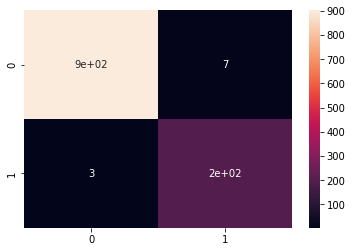

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True);

- **Obtenemos valores razonables de sensitividad, especificitividad y F1.**

- **Diversas pruebas de ajuste de los parámetros no arrojaron mejores resultados.**

- **La matriz de confusión arroja unos errores de predicción (FP y FN) bastante ajustados.**

###Naive Bayes

- Álgoritmo válido para casos de clasificación binaria y multiclase. 

- Establecemos que sus variables predictoras son independientes entre si.

- Vamos a emplear una variante de Naive Bayes que intenta inferir una distribución Gaussiana a los valores:

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define model
model_2 = GaussianNB()

# Train model
model_2.fit(X_train, y_train)

# Predict 
y_pred = model_2.predict(X_test)

# Eval model
compute_metrics(model_2, X_test, y_test, y_pred)

Train/Test split results:
GaussianNB accuracy is 0.968
GaussianNB auc is 0.989
GaussianNB Sensitivity is 0.960
GaussianNB Specificity is 0.970
GaussianNB F1 is 0.917


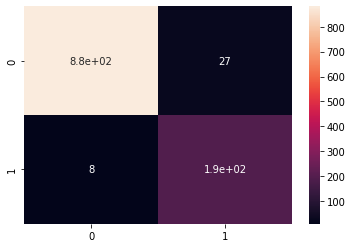

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True);

- **Obtenemos valores de sensitividad, especificitividad y F1 que reflejan una eficacia menor de este modelo comparándolo con la Regresión Lineal. Intentar asemejar nuestras variables a una distribución normal no ha resultado provechoso.** 

- **Al tratarse de un caso real, la asunción de predictores independientes es casi imposible.**

- **La matriz de confusión arroja unos errores de predicción (FP y FN) demasiado abultados para este caso en concreto.**

- **El modelo de Naive Bayes a través del método CategoricalNB() no devolvió resultados. Ya que algunas de las categorías aparecían en el test, pero no en el conjunto de entrenamiento  (probabilidad resultante = 0). Haciendo imposible la predicción y su calificación.**

###KNN

- Calcula la distancia (Euclidiana, Hamming o Manhattan) entre el nuevo punto de datos con cada ejemplo de entrenamiento. Elige las K entradas de la base de datos que más se acercan al nuevo punto de datos. 

- Realiza la votación por mayoría, es decir, la clase/etiqueta más común entre esas K entradas será la clase del nuevo punto de datos.

- Marcamos los pesos en función de la inversa de su distancia, un reducido tamaño de hoja para facilitar el modelado y el número de vecinos que entregó el mejor F1. Acto seguido visualizaremos el error del modelo entre número de vecinos y su matriz de confusión resultante:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Model 3
model_3 = KNeighborsClassifier(leaf_size='10', n_neighbors=6, weights='distance')

# Train model
model_3.fit(X_train, y_train)

# Predict 
y_pred = model_3.predict(X_test)

# Eval model
compute_metrics(model_3, X_test, y_test, y_pred)

Train/Test split results:
KNeighborsClassifier accuracy is 0.992
KNeighborsClassifier auc is 0.991
KNeighborsClassifier Sensitivity is 0.970
KNeighborsClassifier Specificity is 0.997
KNeighborsClassifier F1 is 0.978


Text(0, 0.5, 'Error rate')

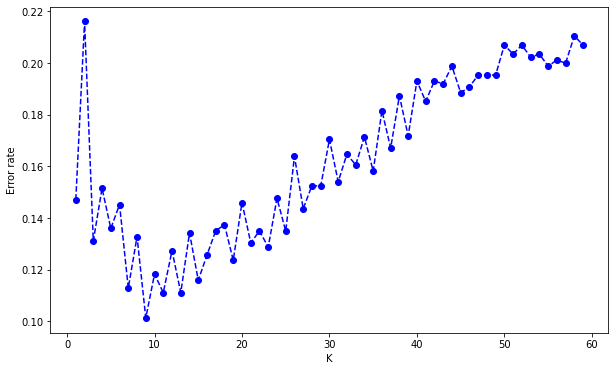

In [ ]:
error_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i, metric= 'hamming')
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(1-metrics.f1_score(y_test, pred_i))
              

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(range(1,60), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')

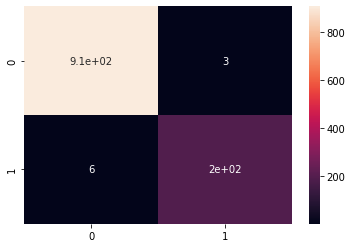

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True);

- **Observamos valores de sensitividad, especificitividad y f1 que reflejan un rendimiento aceptable. Es sensible a los outliers demasiado alejados.**

- **La matriz de confusión muestra un valor de FN (6) elevado para nuestro caso de uso.**

- **Vamos a utilizar el método GridSearch, a través de diferentes rangos de parámetros, para obtener el mejor resultado teórico de este modelo:**

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              'weights': ['uniform', 'distance'],
              'leaf_size': ['10', '20', '30', '40']
              }

# Define model
model_3_2 = KNeighborsClassifier()
# Train model
model_3_2_gs = GridSearchCV(model_3_2, parameters)
model_3_2_gs.fit(X_train, y_train);

In [ ]:
model_3_2_gs.best_estimator_

KNeighborsClassifier(leaf_size='10', n_neighbors=10, weights='distance')

In [ ]:
model_3_2_gs.best_score_

0.9922779922779924

In [ ]:
#### Model 3_2
model_3_2 = KNeighborsClassifier(leaf_size='10', n_neighbors=10, weights='distance')

# Train model
model_3_2.fit(X_train, y_train)

# Predict 
y_pred = model_3_2.predict(X_test)

# Eval model
compute_metrics(model_3_2, X_test, y_test, y_pred)

Train/Test split results:
KNeighborsClassifier accuracy is 0.991
KNeighborsClassifier auc is 0.991
KNeighborsClassifier Sensitivity is 0.970
KNeighborsClassifier Specificity is 0.996
KNeighborsClassifier F1 is 0.975


- **El resultado obtenido con las indicaciones de GridSearch no mejora a nuestro modelo inicial de KNN. Seguramente es necesario probar con una mayor diversidad de parámetros.**

###Decision Tree

- Funciona dividiendo primero el conjunto de entrenamiento en dos subconjuntos mediante una característica y un umbral. Tras la primera división, divide los subconjuntos empleando la misma lógica y así sucesivamente. Deja de repetir la operación cuando alcanza la profundidad máxima (definida por el parámetro max_depth) o si no puede encontrar una división que reduzca la impureza (si introdujéramos el parámetro criterion = 'entropy').

- Marcamos 'gini' como criterio de modelado al haber resuelto mejor F1 que "entropy". Al igual que los parámetros splitter = 'best' y max_depth = 6.

- Tras varias pruebas con otros parámetros de detención, optamos por fijar únicamente los valores de separación de las muestras (min_samples_split = 2, min_samples_leaf = 3).

In [ ]:
model_4 = DecisionTreeClassifier(criterion = 'gini', random_state = 1234, 
                                 splitter = 'best', max_depth = 6, 
                                 min_samples_split = 2, min_samples_leaf = 3
                                 )

# Train model
model_4.fit(X_train, y_train)

# Predict 
y_pred = model_4.predict(X_test)

# Eval model
compute_metrics(model_4, X_test, y_test, y_pred)

Train/Test split results:
DecisionTreeClassifier accuracy is 0.986
DecisionTreeClassifier auc is 0.986
DecisionTreeClassifier Sensitivity is 0.965
DecisionTreeClassifier Specificity is 0.990
DecisionTreeClassifier F1 is 0.961


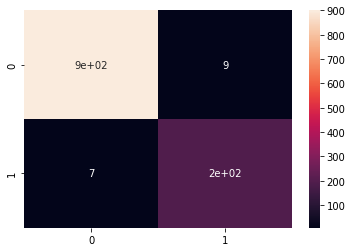

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True)

- **Observamos valores de sensitividad, especificitividad y f1 que reflejan un teórico peor rendimiento en la clasificación que la regresión logística o KNN. Como en un principio era previsible, dada la naturaleza del modelo.**

- **La matriz de confusión muestra valores de FP y FN algo elevados para nuestro caso de uso.**

- **Vamos a utilizar el método GridSearch, a través de diferentes rangos de parámetros, para obtener el mejor resultado teórico de este modelo:**

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]
              }

# Define model
model_4_2 = DecisionTreeClassifier()
# Train model
model_4_2_gs = GridSearchCV(model_4_2, parameters)
model_4_2_gs.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [ ]:
model_4_2_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3, splitter='random')

In [ ]:
model_4_2_gs.best_score_

0.983011583011583

In [ ]:
#### Model 4_2
model_4_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

# Train model
model_4_2.fit(X_train, y_train)

# Predict 
y_pred = model_4_2.predict(X_test)

# Eval model
compute_metrics(model_4_2, X_test, y_test, y_pred)

Train/Test split results:
DecisionTreeClassifier accuracy is 0.982
DecisionTreeClassifier auc is 0.989
DecisionTreeClassifier Sensitivity is 0.936
DecisionTreeClassifier Specificity is 0.992
DecisionTreeClassifier F1 is 0.950


- **El resultado obtenido con las indicaciones de GridSearch no mejora a nuestro modelo inicial de Decision Tree. Seguramente es necesario probar con mayor diversidad de parámetros.**

###Random Forest

- Consiste en utilizar una característica muy fuerte de nuestro conjunto de datos, como división superior entre diferentes árboles de decisión, que a su vez emiten una predicción. 

- Puede utilizarse para tareas de clasificación o regresión. Al realizar una tarea de clasificación, cada árbol de decisión del bosque aleatorio vota por una de las clases a las que pertenece la entrada.

- Para nuestro modelo inicial establecemos unos determinados valores de estimadores, variables, muestreo o detención, que han demostrado ser eficaces en nuestras pruebas:

In [ ]:
model_5 = RandomForestClassifier(random_state = 1234, n_estimators = 100, max_features = 7, 
                                 bootstrap = True, min_samples_split = 4, max_samples = 0.45)

# Train model
model_5.fit(X_train, y_train)

# Predict 
y_pred = model_5.predict(X_test)

# Eval model
compute_metrics(model_5, X_test, y_test, y_pred)

Train/Test split results:
RandomForestClassifier accuracy is 0.995
RandomForestClassifier auc is 0.999
RandomForestClassifier Sensitivity is 0.985
RandomForestClassifier Specificity is 0.997
RandomForestClassifier F1 is 0.985


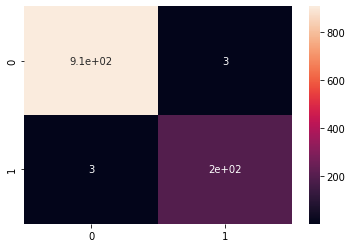

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True)

- **Comprobamos mejores valores de sensitividad, especificitividad y f1 que en el resto de modelos (Regresión Logística, Naive Bayes, KNN y Árbol de decisión).**

- **La votación resultante de la suma de las predicciones de diversos árboles de decisión, suele mejorar la de cada uno de ellos por separado.**

- **La matriz de confusión muestra valores de FP y FN muy razonables para nuestro caso de uso. Con un índice de acierto elevado.**

- **Vamos a utilizar el método GridSearch, a través de diferentes rangos de parámetros, para obtener el mejor resultado teórico de este modelo:**

In [ ]:
parameters = {'max_features': [6, 7, 8],
              'min_samples_split': [3, 4, 5],
              'max_samples': [0.40, 0.45, 0.5]
              }

# Define model
model_5_2 = RandomForestClassifier()
# Train model
model_5_2_gs = GridSearchCV(model_5_2, parameters)
model_5_2_gs.fit(X_train, y_train);

In [ ]:
model_5_2_gs.best_estimator_

RandomForestClassifier(max_features=6, max_samples=0.4, min_samples_split=4)

In [ ]:
model_5_2_gs.best_score_

0.9895752895752896

In [ ]:
#### Model 5_2
model_5_2 = RandomForestClassifier(max_features=7, max_samples=0.5, min_samples_split=5)

# Train model
model_5_2.fit(X_train, y_train)

# Predict 
y_pred = model_5_2.predict(X_test)

# Eval model
compute_metrics(model_5_2, X_test, y_test, y_pred)

Train/Test split results:
RandomForestClassifier accuracy is 0.991
RandomForestClassifier auc is 0.999
RandomForestClassifier Sensitivity is 0.975
RandomForestClassifier Specificity is 0.994
RandomForestClassifier F1 is 0.975


- **El resultado obtenido con las indicaciones de GridSearch no mejora a nuestro modelo inicial de Random Forest. Seguramente es necesario probar con una mayor diversidad de parámetros.**

###Adaboost

- Construye una clasificación fuerte mediante la combinación de múltiples modelos de bajo rendimiento, de modo que se obtiene un clasificador fuerte de alta precisión. Lo consigue estableciendo los pesos de los clasificadores y el entrenamiento de la muestra de datos en cada iteración. De tal manera que asegura las predicciones precisas de las observaciones inusuales. 

- Cualquier algoritmo de aprendizaje automático puede utilizarse como clasificador base si acepta pesos en el conjunto de entrenamiento.

- Para nuestro modelo inicial establecemos unos determinados valores de estimadores e indice de aprendizaje, que han demostrado ser eficaces en nuestras pruebas:

In [ ]:
# Define model
model_6 = AdaBoostClassifier(random_state = 1234, n_estimators = 60, learning_rate = 0.9)
# Train model
model_6.fit(X_train, y_train)

# Predict 
y_pred = model_6.predict(X_test)

# Eval model
compute_metrics(model_6, X_test, y_test, y_pred)

Train/Test split results:
AdaBoostClassifier accuracy is 0.993
AdaBoostClassifier auc is 0.997
AdaBoostClassifier Sensitivity is 0.975
AdaBoostClassifier Specificity is 0.997
AdaBoostClassifier F1 is 0.980


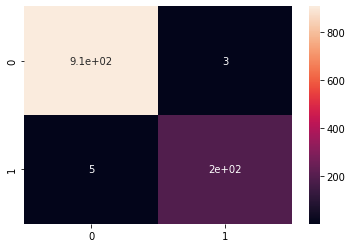

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True)

- **Observamos valores razonables de sensitividad, especificitividad y f1 para nuestro caso de uso. La simplificación de sus parámetros lo convierte en un modelo de referencia.**

- **La matriz de confusión muestra valores de FP y FN favorables para nuestro caso de uso. Con un índice de acierto elevado.**

- **Vamos a utilizar el método GridSearch, a través de diferentes rangos de parámetros, para obtener el mejor resultado teórico de este modelo:**

In [ ]:
parameters = {'n_estimators': [50, 60, 70],
              'learning_rate': [0.9, 1.0, 1.2]
              }

# Define model
model_6_2 = AdaBoostClassifier()
# Train model
model_6_2_gs = GridSearchCV(model_6_2, parameters)
model_6_2_gs.fit(X_train, y_train);

In [ ]:
model_6_2_gs.best_estimator_

AdaBoostClassifier(learning_rate=1.2, n_estimators=60)

In [ ]:
model_6_2_gs.best_score_

0.9907335907335908

In [ ]:
#### Model 6_2
model_6_2 = AdaBoostClassifier(learning_rate=1.2, n_estimators=60)

# Train model
model_6_2.fit(X_train, y_train)

# Predict 
y_pred = model_6_2.predict(X_test)

# Eval model
compute_metrics(model_6_2, X_test, y_test, y_pred)

Train/Test split results:
AdaBoostClassifier accuracy is 0.992
AdaBoostClassifier auc is 0.997
AdaBoostClassifier Sensitivity is 0.970
AdaBoostClassifier Specificity is 0.997
AdaBoostClassifier F1 is 0.978


- **El resultado obtenido con las indicaciones de GridSearch no mejora a nuestro modelo inicial de Adaboost. Seguramente es necesario probar con una mayor diversidad de parámetros.**

###XGBOOST

- Está basado en el algoritmo de árboles de decisión con gradiente. Consiste en aplicar una técnica de regularización mejor para reducir el sobreajuste. Puede manejar valores faltantes y tiene integrado el método de validación cruzada. 

- Para nuestro modelo inicial establecemos unos determinados valores de estimadores y profundidad máxima, que han demostrado ser eficaces en nuestras pruebas:

In [ ]:
# Define model
model_7 = XGBClassifier(random_state = 1234, max_depth = 3, n_estimators= 120)

# Train model
model_7.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_test, y_test)])

# Predict 
y_pred = model_7.predict(X_test)

# Eval model
compute_metrics(model_7, X_test, y_test, y_pred)

[0]	validation_0-error:0.015058	validation_1-error:0.018902
[1]	validation_0-error:0.015058	validation_1-error:0.018902
[2]	validation_0-error:0.015058	validation_1-error:0.018902
[3]	validation_0-error:0.014286	validation_1-error:0.016202
[4]	validation_0-error:0.012741	validation_1-error:0.013501
[5]	validation_0-error:0.010811	validation_1-error:0.013501
[6]	validation_0-error:0.013514	validation_1-error:0.015302
[7]	validation_0-error:0.012355	validation_1-error:0.015302
[8]	validation_0-error:0.011583	validation_1-error:0.013501
[9]	validation_0-error:0.011197	validation_1-error:0.012601
[10]	validation_0-error:0.011197	validation_1-error:0.012601
[11]	validation_0-error:0.011197	validation_1-error:0.012601
[12]	validation_0-error:0.009653	validation_1-error:0.011701
[13]	validation_0-error:0.009653	validation_1-error:0.009901
[14]	validation_0-error:0.008494	validation_1-error:0.009901
[15]	validation_0-error:0.008108	validation_1-error:0.009901
[16]	validation_0-error:0.008494	v

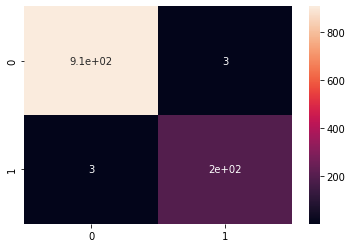

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True)

- **Comprobamos que devuelve valores muy razonables de sensitividad, especificitividad y f1. Queda pantente el alto rendimiento y versatilidad de este modelo.**

- **La matriz de confusión muestra valores de FP y FN muy favorables para nuestro caso de uso. Con un índice de acierto elevado.**

- **A continuación vamos a visualizar la evolución de Train y Test en base a este modelo:**

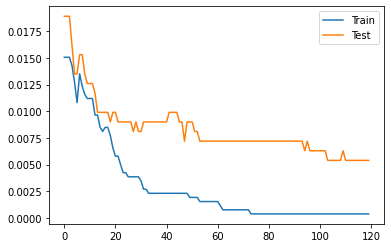

In [ ]:
results = model_7.evals_result()
epochs = len(results['validation_0']['error'])

x_axis = range(0,epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label = 'Train')
ax.plot(x_axis, results['validation_1']['error'], label = 'Test')
plt.legend()

- **Podemos verificar que el número de estimadores se ajusta correctamente al momento en el que test es constante. Por lo que no es necesario ajustar dicho parámetro.**

- **Valoramos positivamente que Test siempre se mantenga por encima de Train, sin ningún cruce prolongado de tendencia entre ellos. Aunque lo ideal sería que las dinamicas de Train y Test estuvieran más juntas.**

Pasamos a visualizar la curva ROC, para comprobar la capacidad de diferenciar clases:

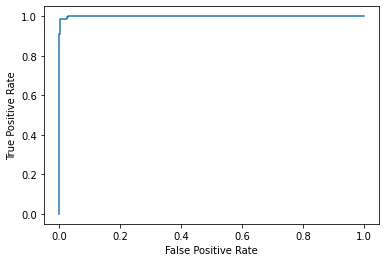

In [ ]:
#define metrics
y_pred_proba = model_7.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- **El umbral de los positivos verdaderos sobre los falsos positivos es muy pronunciado. Señal de que estamos ante un modelo muy equilibrado.**

- A continuación vamos a implementar el método de validación cruzada. Que divide el conjunto de entrenamiento en subconjuntos (cv = número de subconjuntos) llamados iteraciones. A continuación entrena y evalua el modelo del árbol de decisiones tantas veces como el número de subconjuntos. Eligiendo una iteración diferente cada vez para la envaluación y entrenando en las otras "cv-1" iteraciones. El resultado es una matriz que contiene tantas puntuaciones como número de subconjuntos (cv):

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import class_weight
from xgboost.compat import KFold

cv = KFold(n_splits = 5)

model_8 = XGBClassifier(#random_state = 1234,
                        n_estimators = 120,
                        class_weight = 'balanced',
                        booster = 'gbtree',
                        max_depth = 3,
                        scale_pos_weight = 1,
                        reg_lambda = 1
                        )
# Train model
model_8.fit(X_train, y_train, eval_set = [(X_train, y_train),(X_test, y_test)])

# Predict 
y_pred = model_8.predict(X_test)

score = model_8.score(X_train, y_train)
print("score:", score)

scores = cross_val_score(model_8, X_train, y_train, cv = cv, scoring = 'f1')
print("Resultado validación cruzada:", scores)
print("Media de los resultados de validación cruzada:", scores.mean())

preds = model_8.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds)

print('Resultado del test:', score_pred)

# Eval model
compute_metrics(model_8, X_test, y_test, y_pred)

[0]	validation_0-error:0.015058	validation_1-error:0.018902
[1]	validation_0-error:0.015058	validation_1-error:0.018902
[2]	validation_0-error:0.015058	validation_1-error:0.018902
[3]	validation_0-error:0.014286	validation_1-error:0.016202
[4]	validation_0-error:0.012741	validation_1-error:0.013501
[5]	validation_0-error:0.010811	validation_1-error:0.013501
[6]	validation_0-error:0.013514	validation_1-error:0.015302
[7]	validation_0-error:0.012355	validation_1-error:0.015302
[8]	validation_0-error:0.011583	validation_1-error:0.013501
[9]	validation_0-error:0.011197	validation_1-error:0.012601
[10]	validation_0-error:0.011197	validation_1-error:0.012601
[11]	validation_0-error:0.011197	validation_1-error:0.012601
[12]	validation_0-error:0.009653	validation_1-error:0.011701
[13]	validation_0-error:0.009653	validation_1-error:0.009901
[14]	validation_0-error:0.008494	validation_1-error:0.009901
[15]	validation_0-error:0.008108	validation_1-error:0.009901
[16]	validation_0-error:0.008494	v

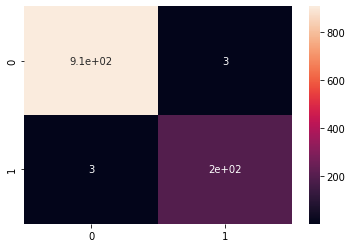

In [ ]:
conf_mtrx = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mtrx.ravel() 

sns.heatmap(conf_mtrx, annot = True)

- **Vemos que devuelve los mismos valores mde sensitividad, especificitividad, F1, FP y FN que el modelo sin validación cruzada. Cabe realizar más pruebas, ajustando los hiperparámetros, para optimizar la validación cruzada.**

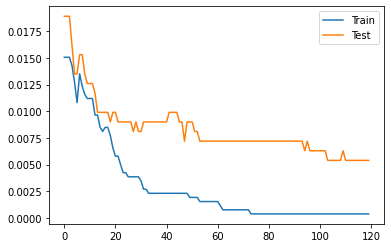

In [ ]:
def plot_errors(final_model):
  import matplotlib.pyplot as plt 

  results = final_model.evals_result()
  epochs = len(results['validation_0']['error'])

  x_axis = range(0,epochs)  
  fig, ax = plt.subplots()
  ax.plot(x_axis, results['validation_0']['error'], label = 'Train')
  ax.plot(x_axis, results['validation_1']['error'], label = 'Test')
  plt.legend()

plot_errors(model_8)

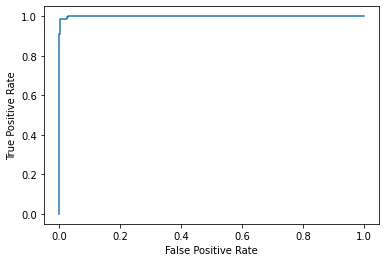

In [ ]:
#define metrics
y_pred_proba = model_8.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- **De igual manera obtenemos la mismas visualizaciones de Train, Test y curva ROC que el modelo sin validación cruzada. Efectivamente necesitamos cambiar los hiperparámetros de partida para obtener un mejor resultado con validación cruzada.**

##4.- Conclusiones

- **Regresión estadística nos ha dado un F1 score de (0.975). Algo por debajo de las calificaciones de los modelos KNN (0.978), Random Forest (0.985), Adaboost (0.98) y XGBoost (0.985). Los modelos más potentes y compactos, son capaces de obtener relaciones complejas. Contamos con valores aceptables en la matriz de confusión.**

- **Naive Bayes, a través de una aproximación Gaussiana, entregó un peor valor de F1 (0.917) que el del resto de modelos. Al tratarse de un caso real, la asunción de predictores independientes es casi imposible. La matriz de confusión arroja unos errores de predicción (FP y FN) demasiado abultados. El modelo de Naive Bayes a través del método categórico no devolvió resultados. Haciendo imposible la predicción y su calificación.**

- **KNN muestra un F1 (0.978) menor que el de modelos más potentes y rápidos. Es sensible a los outliers demasiado alejados, ruido y distancia de los puntos. La aplicación del método GridSearch no consiguió mejorar el rendimiento de nuestro modelo original. Seguramente es necesario probar con una mayor diversidad de parámetros.**

- **Decission Tree (F1 - 0.961) es menos eficaz que los modelos más potentes, quedando únicamente por delante Naive Bayes Gaussian(). Refleja alguna dificultad ante datos complejos, a pesar de su robustez al ruido y valores atípicos. GridSearch empeoró respecto al resultado del árbol de decisión inicial.**

- **Random Forest obtuvo el mejor F1 (0.985 empatado con XGBOOST). Clara señal de una buena corrección del overfitting. De igual manera se muestra estable con nuevas muestras, puesto que al utilizar multitud de árboles sigue prevaleciendo el promedio de sus votaciones. Obtuvo la matriz de confusión con mejores resultados e igualmente no reflejó ninguna mejora tras aplicar GridSearch.**

- **Adaboost con un F1 de 0.98 muestra un buen rendimiento, simplicidad de parámetros y una ajustada tasa de errores. Aunque quizas se resienta por la aparición de outliers (o datos desequilibrados) que desemboca en una disminución en la precisión de la clasificación con un entrenamiento algo sesgado. GridSearch tampoco recomienda unos parámetros que mejoren el F1 original.**

- **XGBOOST iguala el mejor resultado de F1 (0.985) alcanzado por el Random Forest. Su gran versatilidad y potencia se reflejan en los notables valores de la matriz de confusión y en las visualizaciones de los errores y curva ROC. A falta de profundizar en su parametrización, podríamos vislumbrar que es el modelo más eficaz de todos cuantos hemos aplicado en este estudio. La aplicación de la validación cruzada tampoco mejoró los resultados obtenidos anteriormente.**

##5.- Kaggle submission 
https://www.kaggle.com/t/c7f9b11ea913482eb868aa2364a81cef

In [ ]:
#------------------------------------------------
# Cargar datos de validación

# https://drive.google.com/file/d/15lPur5igWKQeddJQENnQFt4tmBqrd0ol/view?usp=sharing
!gdown https://drive.google.com/uc?id=15lPur5igWKQeddJQENnQFt4tmBqrd0ol


data_valid = pd.read_csv('heart_valid.csv')
dt_valid = data_valid.drop(['Id'], axis=1)


#---------------------------------------------------
# Aplicar las trasnformaciones necesarias (las mismas del train)

# apply normalization techniques

for column in data_min_max.columns:
    dt_valid[column] = (dt_valid[column] - dt_valid[column].min()) / (dt_valid[column].max() - dt_valid[column].min())       
  
# view normalized data
dt_valid.head()

#dt_valid = data_valid.drop(['Id'], axis=1)

Downloading...
From: https://drive.google.com/uc?id=15lPur5igWKQeddJQENnQFt4tmBqrd0ol
To: /content/heart_valid.csv
100% 200k/200k [00:00<00:00, 67.1MB/s]


,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x5,x1,x2,bCP,bWT,bW,Li,count1,count2,count3
0,0.291744,0.586083,0.307692,0.260870,0.187500,0.629954,0.205882,0.605870,0.051817,0.623793,...,0.098591,0.173735,0.010115,0.244395,0.514450,0.169597,0.131778,0.256881,0.468439,0.163820
1,0.212494,0.618322,0.230769,0.260870,0.250001,0.654887,0.205882,0.584906,0.047879,0.609567,...,0.112672,0.294707,0.008104,0.190583,0.625305,0.140354,0.116855,0.348624,0.631229,0.280832
2,0.156606,0.569124,0.230769,0.391304,0.250001,0.662172,0.205882,0.578616,0.053049,0.510884,...,0.239436,0.571006,0.006999,0.217489,0.403251,0.169597,0.200694,0.371560,0.617940,0.293626
3,0.163885,0.532648,0.076923,0.304348,0.281264,0.654887,0.205882,0.584906,0.059346,0.577607,...,0.239436,0.525143,0.008036,0.206278,0.455521,0.163743,0.226079,0.169725,0.551495,0.155790
4,0.247842,0.617470,0.000000,0.217391,0.250001,0.652415,0.235294,0.587002,0.049054,0.583903,...,0.098591,0.183617,0.008969,0.201794,0.562374,0.105267,0.182200,0.316514,0.521595,0.213729


Submission

In [ ]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, name, dt_valid):

    Id_aux = pd.read_csv('heart_valid.csv')

    X_valid = dt_valid  
    y_valid_pred = final_model.predict(X_valid)
    
    submission = pd.DataFrame({ 'Id': Id_aux['Id'],
                                'VF': y_valid_pred })
    submission.to_csv('./submission_'+name+'.csv', index = False)
    return(submission)

In [ ]:
eval_best_model(model_8, 'Juan_model_8_XG_3', dt_valid)

,Id,VF
0,4,0
1,9,0
2,12,0
3,18,0
4,33,1
...,...,...
948,9287,0
949,9293,0
950,9313,0
951,9316,0
